In [3]:
from urllib.request import urlretrieve

In [4]:
!pip install pandas --upgrade --quiet

In [5]:
import pandas as pd

In [8]:
bank_data = pd.read_csv("C:/Users/adedo/Desktop/Data_analytics/data/bank.csv")

In [9]:
bank_data

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
...,...
4516,"33;""services"";""married"";""secondary"";""no"";-333;..."
4517,"57;""self-employed"";""married"";""tertiary"";""yes"";..."
4518,"57;""technician"";""married"";""secondary"";""no"";295..."
4519,"28;""blue-collar"";""married"";""secondary"";""no"";11..."


In [11]:
# use the "sep" attribute of "pd.read_csv to separate the columns
bank_data = pd.read_csv("C:/Users/adedo/Desktop/Data_analytics/data/bank.csv",sep=";") 

In [12]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [27]:
# Pandas If else statement to create a new column called amount that changes negative value in balance to zero
bank_data['amount'] = bank_data['balance']
bank_data.loc[bank_data['balance'] < 0, 'amount'] = 0

In [28]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,benford_variable,amount
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,1,1787
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,4,4789
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,1,1350
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,1,1476
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,-,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,-,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,2,295
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,1,1137


In [29]:
# Get first digit in the amount column and convert to string
bank_data['benford_variable'] = bank_data['amount'].astype(str).str[:1]

In [30]:
bank_data['benford_variable']

0       1
1       4
2       1
3       1
4       0
       ..
4516    0
4517    0
4518    2
4519    1
4520    1
Name: benford_variable, Length: 4521, dtype: object

In [31]:
# Group the data by the benford variable and count number of occurence
benford_data = bank_data.groupby("benford_variable")["benford_variable"].count()

In [32]:
benford_data

benford_variable
0     723
1    1098
2     657
3     490
4     420
5     275
6     270
7     222
8     206
9     160
Name: benford_variable, dtype: int64

In [33]:
type(benford_data)

pandas.core.series.Series

In [37]:
# Covert the panda series to dataframe by creating a dict and pass this as the data param to the dataframe constructor
benford_table = pd.DataFrame({'Value':benford_data.index, 'count':benford_data.values})

In [38]:
benford_table

,Value,count
0,0,723
1,1,1098
2,2,657
3,3,490
4,4,420
5,5,275
6,6,270
7,7,222
8,8,206
9,9,160


In [39]:
# Drop the first row because 0 is not needed for benford's law calculation
benford_table = benford_table.drop(0)

In [40]:
benford_table

,Value,count
1,1,1098
2,2,657
3,3,490
4,4,420
5,5,275
6,6,270
7,7,222
8,8,206
9,9,160


In [41]:
count_sum = benford_table['count'].sum()

In [42]:
count_sum

3798

In [47]:
benford_table['percentage'] = ((benford_table['count'] / count_sum) * 100).round(1)

In [49]:
benford_table

,Value,count,percentage
1,1,1098,28.9
2,2,657,17.3
3,3,490,12.9
4,4,420,11.1
5,5,275,7.2
6,6,270,7.1
7,7,222,5.8
8,8,206,5.4
9,9,160,4.2


In [51]:
import numpy as np

In [62]:
# Convert value column to Int
benford_table = benford_table.astype({'Value':'int'})

In [66]:
benford_table['benford_value']= np.log10(1+(1/benford_table['Value']))*100

In [67]:
benford_table

,Value,count,percentage,benford_value
1,1,1098,28.9,30.103000
2,2,657,17.3,17.609126
3,3,490,12.9,12.493874
4,4,420,11.1,9.691001
5,5,275,7.2,7.918125
6,6,270,7.1,6.694679
7,7,222,5.8,5.799195
8,8,206,5.4,5.115252
9,9,160,4.2,4.575749


In [69]:
!pip install matplotlib --upgrade --quiet

In [70]:
import matplotlib.pyplot as plt

<Axes: xlabel='Value'>

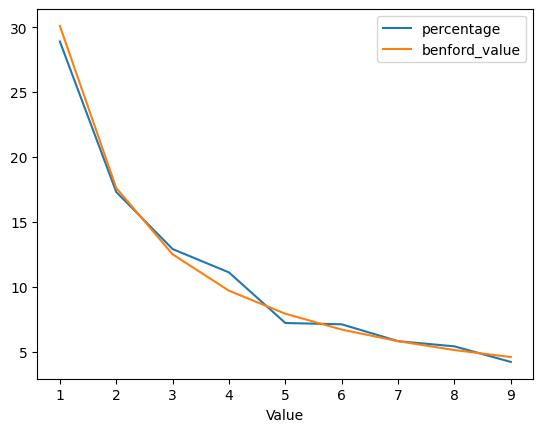

In [71]:
benford_table.plot(x="Value", y=["percentage", "benford_value"])